In [92]:
import pandas as pd
from scipy.stats import skew 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest, chi2

**Loading The dataset**

In [49]:
data=pd.read_csv("D:\Intern_applied\Heliverse_assignment\HR-Employee-Attrition.csv")
pd.set_option('display.max_columns',50)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


__*PreProcessing of Dataset*__

In [50]:
# pd.set_option('display.max_rows', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Checking for null values in dataset**

In [51]:

data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**Statistical summary of dataset**

In [52]:

data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [53]:
data.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


**Checking for special characters**

In [54]:
for i in data.select_dtypes(include="object").columns:
    print(data[i].value_counts(),"\n")

Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64 

Gender
Male      882
Female    588
Name: count, dtype: int64 

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64 

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64 

Over18
Y    147

In [55]:
for i in data.select_dtypes(include="int"):
    col_skewnees=skew(data[i])
    print("skewness of " + i + " is",col_skewnees)

skewness of Age is 0.41286446154785084
skewness of DailyRate is -0.003514976958291024
skewness of DistanceFromHome is 0.9571400469829039
skewness of Education is -0.2893854052028825
skewness of EmployeeCount is nan
skewness of EmployeeNumber is 0.01655710251921753
skewness of EnvironmentSatisfaction is -0.3213261358382832
skewness of HourlyRate is -0.03227797319055416
skewness of JobInvolvement is -0.4979106286269671
skewness of JobLevel is 1.0243546583925869
skewness of JobSatisfaction is -0.3293354633089524
skewness of MonthlyIncome is 1.3684185123330814
skewness of MonthlyRate is 0.01855884556846042
skewness of NumCompaniesWorked is 1.0254233954371303
skewness of PercentSalaryHike is 0.8202898522796266
skewness of PerformanceRating is 1.9199210412109473
skewness of RelationshipSatisfaction is -0.3025184698222079
skewness of StandardHours is nan
skewness of StockOptionLevel is 0.9679912809556104
skewness of TotalWorkingYears is 1.11603155825941
skewness of TrainingTimesLastYear is 0.

C:\Users\Dell\AppData\Local\Temp\ipykernel_1256\4109672820.py:2: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



**We are going to utilize random forest due to class imbalance ass well as it provide robustness on skewness**

In [56]:
for i in data.columns:
    print("Unique values in " + i +" is" ,data[i].unique(),"\n")

Unique values in Age is [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60] 

Unique values in Attrition is ['Yes' 'No'] 

Unique values in BusinessTravel is ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Unique values in DailyRate is [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329

**Removing useless cols "Over18","EmployeeCount", "EmployeeNumber" and "StandardHours" as it does not contribute to learning of model**

In [57]:
data.shape

(1470, 35)

In [58]:
data_1=data.drop(['Over18','EmployeeCount',"EmployeeNumber","StandardHours"],axis=1)


In [59]:
data_1.shape

(1470, 31)

In [60]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

__MonthlyIncome Vs Attrition__

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

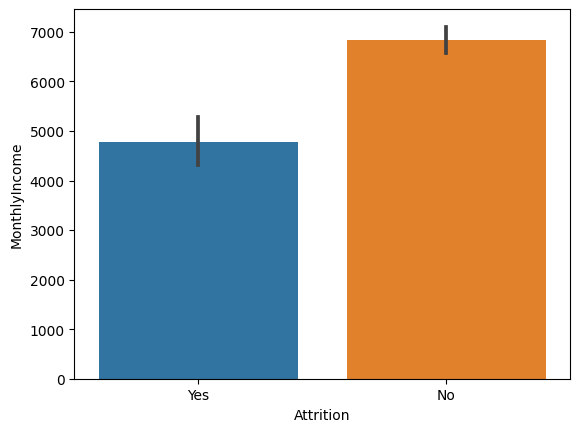

In [61]:
sns.barplot(y="MonthlyIncome",x="Attrition",data=data_1)

__*PercentSalaryHike	vs Attrition*__

<Axes: xlabel='PercentSalaryHike', ylabel='Counts'>

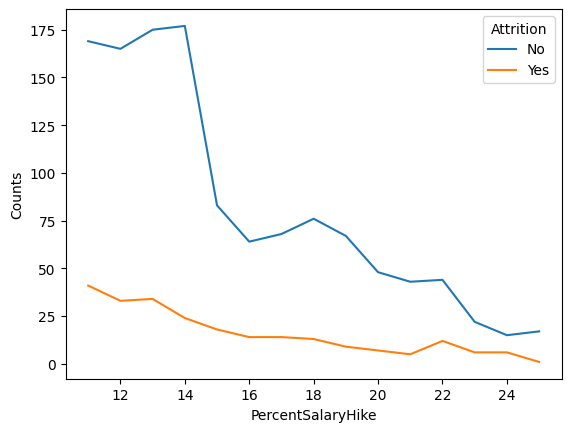

In [62]:
hike_att = data_1.groupby(['PercentSalaryHike', 'Attrition']).apply(lambda x: x['DailyRate'].count()).reset_index(name='Counts')
sns.lineplot(x="PercentSalaryHike",y='Counts',hue="Attrition",data=hike_att)

Enhanced salary increments serve as a significant incentive for employees, encouraging improved performance and fostering retention within the organization. Consequently, the likelihood of an employee departing from an organization offering lower salary hikes is considerably higher compared to one providing substantial salary increments.

__*Business Travel vs Attrition*__

<Axes: xlabel='BusinessTravel', ylabel='count'>

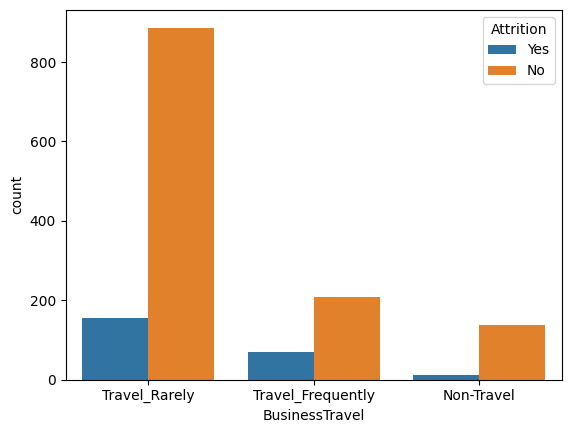

In [63]:
sns.countplot(x="BusinessTravel",hue="Attrition",data=data_1)

__*JobRole And JobSatisfaction effect on Attrition*__

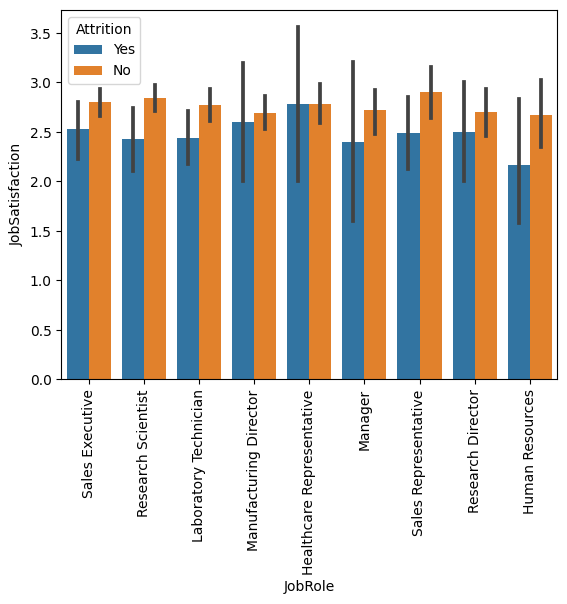

In [64]:
ax=sns.barplot(x="JobRole",y="JobSatisfaction",hue="Attrition",data=data_1)
plt.xticks(rotation=90)
plt.show()

__*JobRole vs Attrition*__

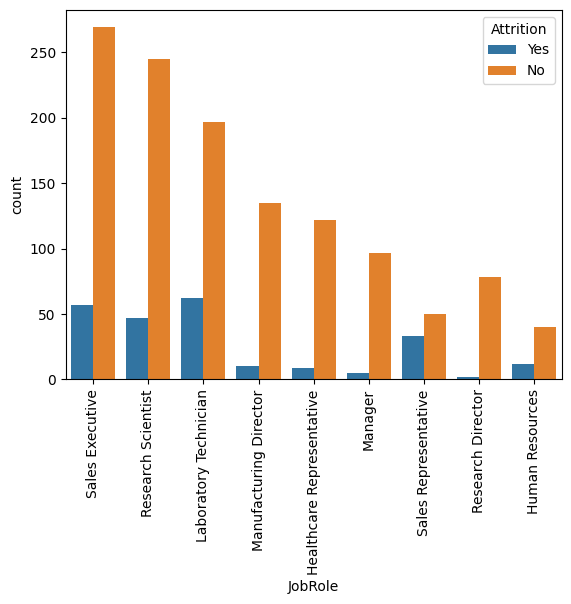

In [65]:
sns.countplot(x="JobRole",hue="Attrition",data=data_1)
plt.xticks(rotation=90)
plt.show()

The analysis suggests that higher-level job roles within the organization demonstrate lower attrition rates compared to lower-level roles. Positions such as manufacturing directors, healthcare representatives, managers, and research directors exhibit notably lower attrition rates, indicating that individuals in these roles are less likely to leave the company.

Conversely, roles at lower organizational levels, such as sales representatives, laboratory technicians, and human resources personnel, demonstrate higher attrition rates. This insight implies that individuals in higher-level job roles tend to stay with the company more consistently, contributing to a more stable workforce

__*Department vs Attrition*__

<Axes: xlabel='Department', ylabel='count'>

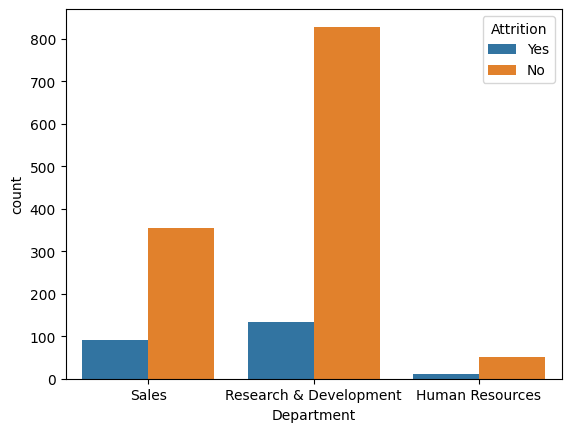

In [66]:
sns.countplot(x="Department",hue="Attrition",data=data_1)
# plt.xticks(rotation=90)
# plt.show()

This dataset includes three primary departments. Among them, the Sales department exhibits the highest attrition rate at 20.63%, trailed by the Human Resources Department at 19.05%. Conversely, the Research and Development department demonstrates the lowest attrition rate, indicating stability and contentment within the department, as depicted in the chart (13.84%).

__*Attrition Status Distribution*__

In [67]:
attrition_distribution = data_1['Attrition'].value_counts(normalize=True) * 100

# Create a pie chart
fig = px.pie(values=attrition_distribution, names=attrition_distribution.index, 
             title='<b>Attrition Status Distribution</b>', 
             labels={'names': 'Attrition Status', 'values': 'Percentage'}, height=400,
             color_discrete_sequence=['#C53E4A', '#419D9D'])  # Specify colors directly here

fig.update_layout(title_x=0.5, 
                  legend=dict(orientation='h', yanchor='bottom', y=-0.3, xanchor='center', x=0.5),
                  font_color='#28221D',
                  paper_bgcolor='#EADFC7',
                  plot_bgcolor='#EADFC7')

fig.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.49))

fig.show()

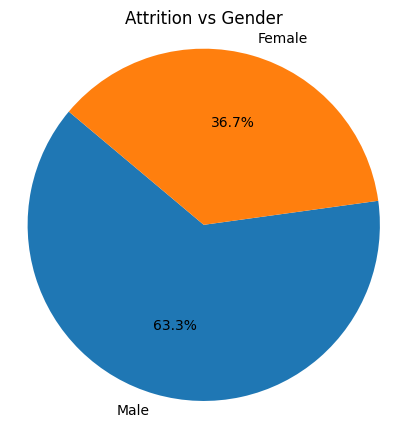

In [68]:
# Example data
attrition_yes = data_1[data_1['Attrition'] == 'Yes']
attrition_gender_counts = attrition_yes['Gender'].value_counts()
# sizes = data_1['Gender'].value_counts()  # Sizes of each slice

# Create a pie chart
plt.figure(figsize=(5, 5))  # Set the figure size
plt.pie(attrition_gender_counts, labels=['Male','Female'], autopct='%1.1f%%', startangle=140)  # Create the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.title('Attrition vs Gender')  # Set the title

plt.show()

The data indicates that the attrition rate is 36.7% for females and 63.3% for males. This suggests a higher attrition rate among males compared to females, potentially influenced by various factors such as job satisfaction, career opportunities, and workplace environment.

__*Age vs Attrition*__

<Axes: xlabel='Age', ylabel='Counts'>

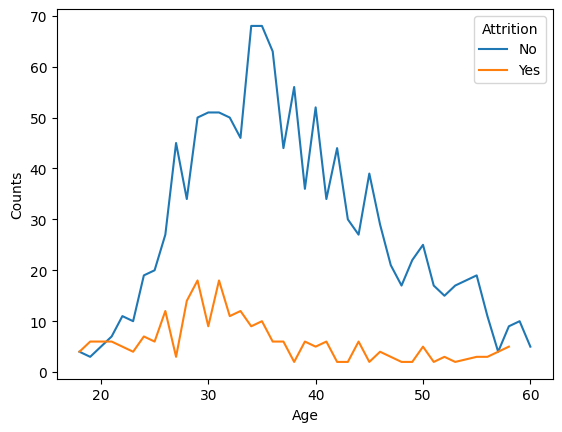

In [69]:
age_att = data_1.groupby(['Age','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
# counts = data_1['Age'].groupby('Age')['Attrition'].count().reset_index()
sns.lineplot(x='Age',y="Counts",data=age_att,hue='Attrition')


The age group between 28-32 witnesses the highest attrition rate, indicating a critical phase where individuals may reassess their career paths. This trend gradually declines with advancing age, reflecting a growing emphasis on job stability and long-term commitments.
Conversely, the early career stages, notably between 18-20, often see heightened attrition as individuals explore different opportunities. This pattern reaches a turning point around the age of 21, marking a transition towards more stable employment decisions.

In [70]:
obj_list=data_1.select_dtypes(include=['object']).columns

In [71]:

Le=LabelEncoder()

for i in obj_list:
    data_1[i]=Le.fit_transform(data_1[i].astype(str))

In [72]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

__*Model Devlopment*__

In [73]:
X=data_1.drop(['Attrition'],axis=1)

In [74]:
y=data_1['Attrition']

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)

Shape of X_train: (1029, 30)
Shape of X_test: (441, 30)


In [76]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
Y_pred_dt=decision_tree.predict(X_test)

decision_tree_score=decision_tree.score(X_test,Y_test)*100

In [77]:
random_forest=RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train,Y_train)
Y_pred_rf=random_forest.predict(X_test)

random_forest_score=random_forest.score(X_test,Y_test)*100

In [78]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  80.04535147392289
Random Forest Score:  86.84807256235828


**Evaluation**

In [79]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[329  51]
 [ 37  24]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[376   4]
 [ 54   7]]


In [80]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       380
           1       0.32      0.39      0.35        61

    accuracy                           0.80       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.82      0.80      0.81       441

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.64      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.84      0.87      0.83       441



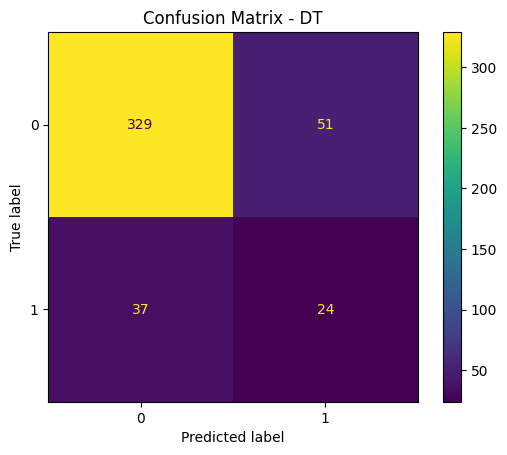

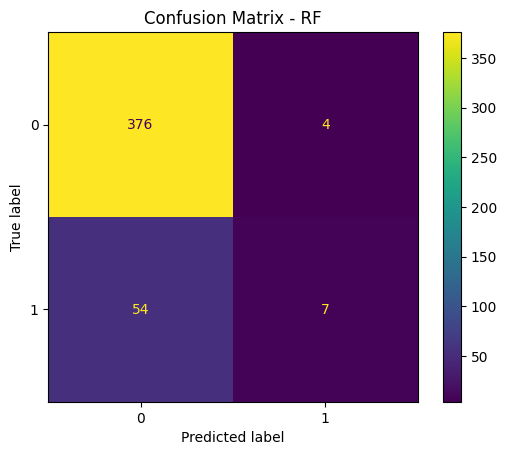

In [81]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

**Random Forest has good precision and hence F1-Score, Random Forest comes out to be better as expected**

__*Optimizing the model*__

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



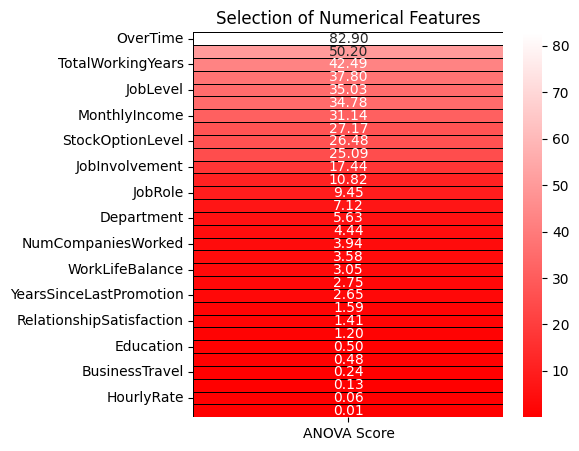

In [110]:
numerical_features=X.select_dtypes(include=['number']).columns
# Define custom colormap with two colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "white"])

from sklearn.feature_selection import SelectKBest, f_classif

features = X_train.loc[:,numerical_features]
target = pd.DataFrame(Y_train)

best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.subplots(figsize=(5, 5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=custom_cmap, linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.show()


The ANOVA F-test is a common tool used to assess how strongly each feature is linked to the target variable in a classification job.

It's especially handy when you're dealing with a categorical target and numerical predictors. This test helps pick out numeric features that show big differences in their average values across various categories of the target. This ability makes it a great method for choosing relevant numeric features for classification tasks.

When you use the ANOVA F-test for feature selection, the ANOVA score shows the F-value for each feature. This value is the ratio of variance between groups to variance within groups.

A high ANOVA score means the feature has a strong connection with the target variable, suggesting it could be really useful for predicting the target.

We will drop the these features : YearsSinceLastPromotion, DailyRate, PercentSalaryHike, DistanceFromHome, NumCompaniesWorked, HourlyRate, MonthlyRate

Now, We will prepare the datasets for data scaling by removing features according to the statistical tests mentioned above.

__*Feature Selection*__

In [82]:
data_opt=data_1.drop(['YearsSinceLastPromotion', 'DailyRate', 'PercentSalaryHike', 'DistanceFromHome', 'NumCompaniesWorked', 'HourlyRate', 'MonthlyRate'],axis=1)

In [86]:
X_opt=data_opt.drop(['Attrition'],axis=1)
y_opt=data_opt['Attrition']

In [87]:
X_train_opt,X_test_opt,Y_train_opt,Y_test_opt=train_test_split(X_opt,y_opt,test_size=0.3,random_state=42)

*Expermenting with hyperparameter (n_estimators=1000)*

In [113]:
rt_opt=RandomForestClassifier(n_estimators= 1000)
rt_opt.fit(X_train_opt,Y_train_opt)
y_pred_opt=rt_opt.predict(X_test_opt)
accuracy=rt_opt.score(X_test_opt,Y_test_opt)*100


In [114]:
print("Before",random_forest_score)
print("After",accuracy)

Before 86.84807256235828
After 86.39455782312925


__*Upon analysing the optimization of the model it is concluded that it does not have huge impacrt on the model*__